## Introducción - 

### I.1 Precio Compraventa - Territorio

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

df_precio = pd.read_csv('../data/precio_cv_final.csv')

df_prec_long = df_precio.melt(id_vars='Territorio', var_name='Año', value_name='Precio')

df_prec_long['Año'] = df_prec_long['Año'].astype(int)


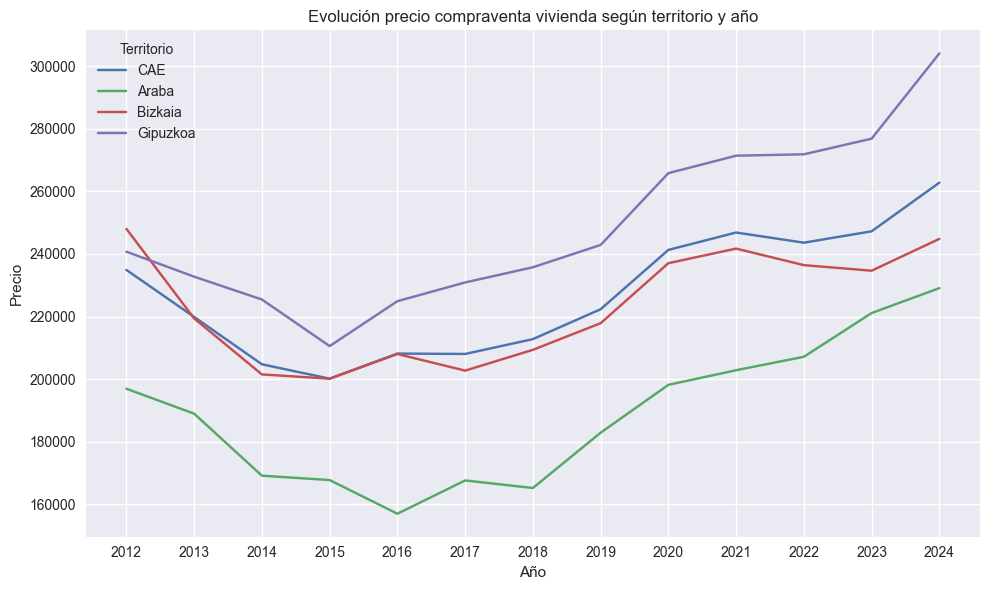

In [2]:
# plt.rcdefaults()

plt.style.use("seaborn-v0_8")  # Un estilo tipo seaborn más suave

fig, ax1 = plt.subplots(figsize=(10, 6))

sns.lineplot(data=df_prec_long, x='Año', y='Precio', hue='Territorio', ax=ax1)
ax1.set_ylabel('Precio')
ax1.set_xlabel('Año')
ax1.set_title('Evolución precio compraventa vivienda según territorio y año')

# Formato del eje X: solo años enteros
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.tight_layout()

# Código para ir repitiendo en cada gráfico, selecciona ruta salida
ruta = "../img/intro/"
os.makedirs(ruta, exist_ok=True)
nombre_archivo = "precio_compraventa_territorio.png"
plt.savefig(os.path.join(ruta, nombre_archivo))

plt.show()

### I.2 Precio Alquiler - Teritorio - Año

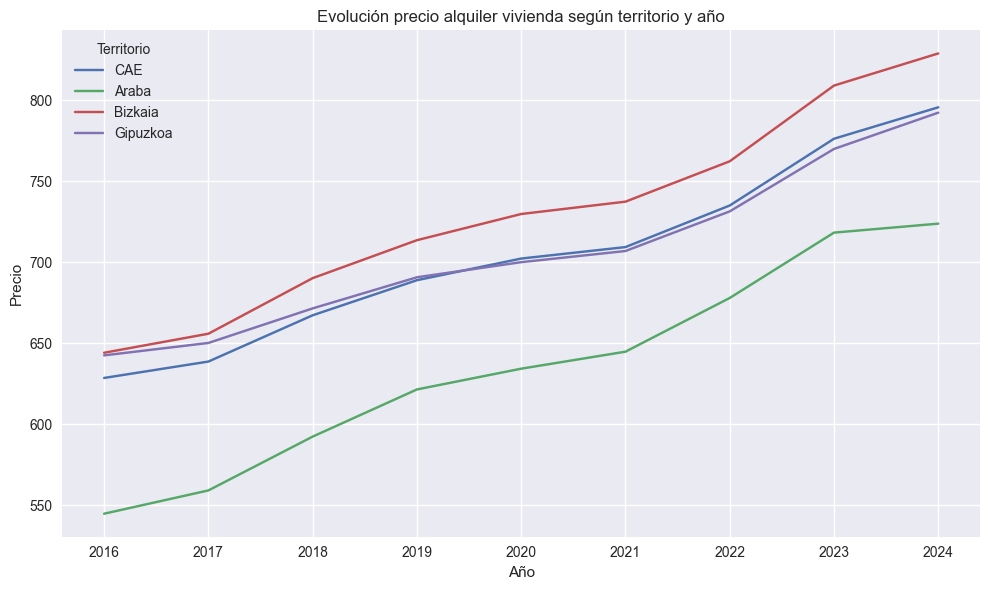

In [ ]:
import matplotlib.ticker as ticker

df_prec_alq = pd.read_csv('../data/precio_alquiler_final.csv')

df_precalq_long = df_prec_alq.melt(id_vars='Territorio', var_name='Año', value_name='Precio')

df_precalq_long['Año'] = df_precalq_long['Año'].astype(int)

fig, ax1 = plt.subplots(figsize=(10, 6))

sns.lineplot(data=df_precalq_long, x='Año', y='Precio', hue='Territorio', ax=ax1)
ax1.set_ylabel('Precio')
ax1.set_xlabel('Año')

#Sirve para que en eje X se vea como años enteros sin decimales
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))


plt.title('Evolución precio alquiler vivienda según territorio y año')
plt.tight_layout()

ruta = '../img/intro/'
os.makedirs(ruta, exist_ok=True)
nombre_archivo = 'precio_alquiler_territorio_año.jpg'
plt.savefig(os.path.join(ruta, nombre_archivo))


plt.show()


## hipotesis 1: más vivienda en territorios con más suelo liberado

NameError: name 'os' is not defined

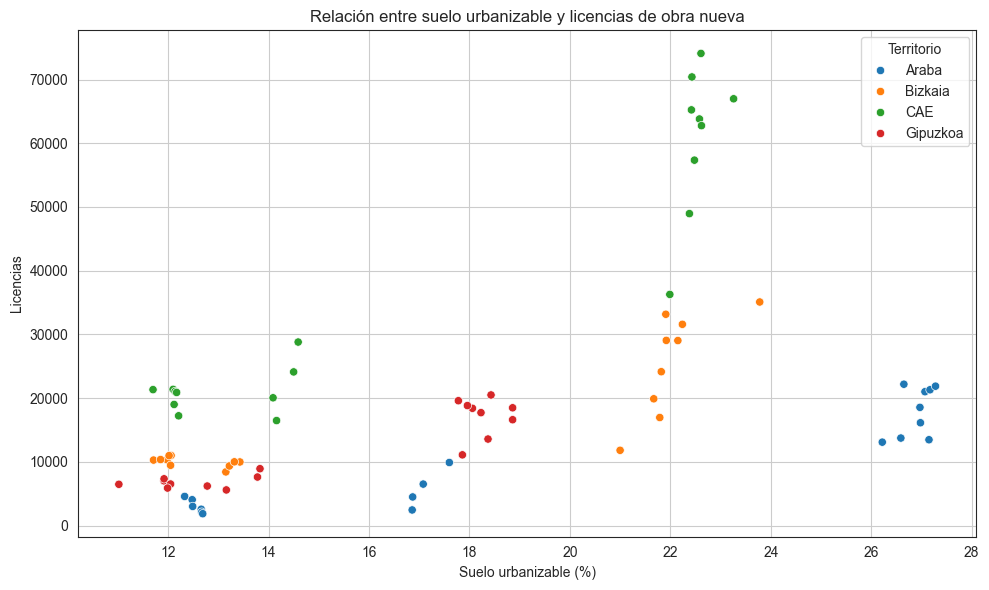

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_licencias = pd.read_csv('../data/licencias_totales.csv')
df_suelo = pd.read_csv('../data/suelo_urbanizable_final.csv')

df_lic_long = df_licencias.melt(id_vars='Territorio', var_name='Año', value_name='Licencias')
df_suelo_long = df_suelo.melt(id_vars='Territorio', var_name='Año', value_name='Suelo_urbanizable')

df_lic_long['Año'] = df_lic_long['Año'].astype(int)
df_suelo_long['Año'] = df_suelo_long['Año'].astype(int)

df_merged = pd.merge(df_lic_long, df_suelo_long, on=['Territorio', 'Año'])

# Grafico Scatter
plt.figure(figsize=(10, 6))
sns.set_style("white")
sns.scatterplot(data=df_merged, x='Suelo_urbanizable', y='Licencias', hue='Territorio')
plt.title('Relación entre suelo urbanizable y licencias de obra nueva')
plt.xlabel('Suelo urbanizable (%)')
plt.ylabel('Licencias')
plt.grid(True)
plt.tight_layout()

# Código para ir repitiendo en cada gráfico, selecciona ruta salida
ruta = "../img/hipotesis_1/"
os.makedirs(ruta, exist_ok=True)
nombre_archivo = "relacion_suelo_licencias.jpg"
plt.savefig(os.path.join(ruta, nombre_archivo))

plt.show()

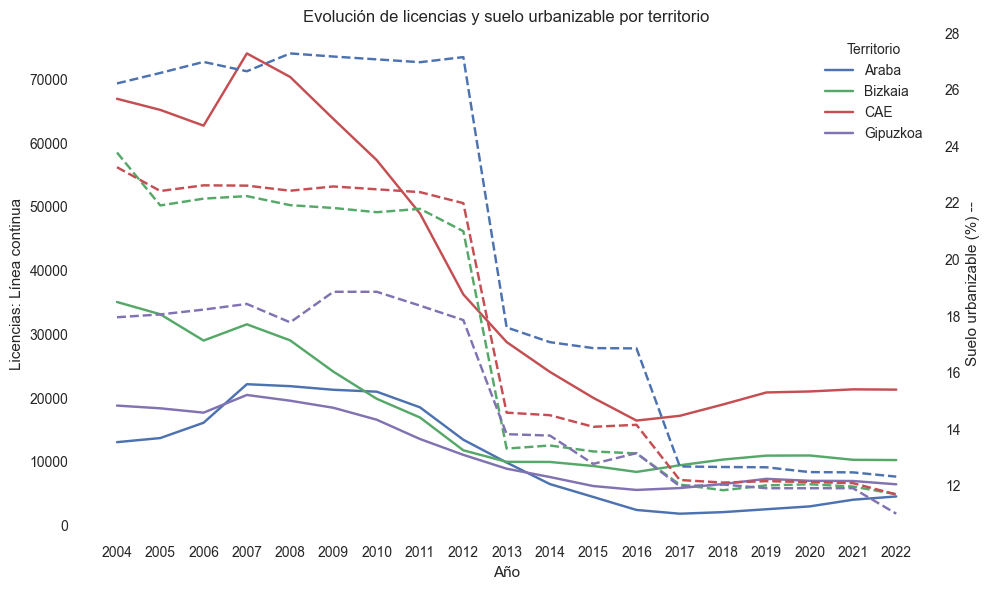

In [ ]:
import matplotlib.ticker as ticker

fig, ax1 = plt.subplots(figsize=(10, 6))

sns.lineplot(data=df_merged, x='Año', y='Licencias', hue='Territorio', ax=ax1)
ax1.set_ylabel('Licencias: Línea continua')
ax1.set_xlabel('Año')

#Sirve para que en eje X se vea como años enteros sin decimales
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))

ax2 = ax1.twinx()
sns.lineplot(data=df_merged, x='Año', y='Suelo_urbanizable', hue='Territorio', ax=ax2, linestyle='--', legend=False)
ax2.set_ylabel('Suelo urbanizable (%) --')

plt.title('Evolución de licencias y suelo urbanizable por territorio')
plt.tight_layout()

ruta = "../img/hipotesis_1/"
os.makedirs(ruta, exist_ok=True)
nombre_archivo = "licencias_suelo_territorio.jpg"
plt.savefig(os.path.join(ruta, nombre_archivo))

plt.show()


# Hipotesis 2 - mayor número de viviendas construidas baja el precio de la vivienda

In [ ]:
import pandas as pd

df_precio = pd.read_csv('../data/precio_cv_final.csv')
df_licencias = pd.read_csv('../data/licencias_final.csv')

df_precio_melt = df_precio.melt(id_vars='Territorio', var_name='Año', value_name='Precio')
df_licencias_melt = df_licencias.melt(id_vars='Territorio', var_name='Año', value_name='Licencias')

df = pd.merge(df_precio_melt, df_licencias_melt, on=['Territorio', 'Año'])

df['Año'] = df['Año'].astype(int)



<Figure size 1000x600 with 0 Axes>

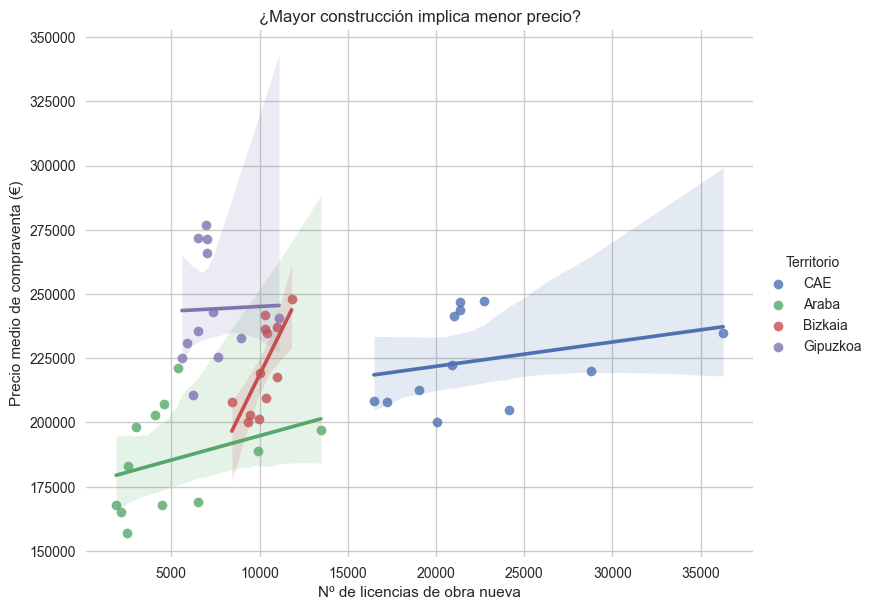

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='Licencias', y='Precio', hue='Territorio', height=6, aspect=1.3)
plt.title('¿Mayor construcción implica menor precio?')
plt.xlabel('Nº de licencias de obra nueva')
plt.ylabel('Precio medio de compraventa (€)')
plt.grid(True)

# Código para ir repitiendo en cada gráfico, selecciona ruta salida
ruta = "../img/Hipotesis_2/"
os.makedirs(ruta, exist_ok=True)
nombre_archivo = "construccion_y_precio.jpg"
plt.savefig(os.path.join(ruta, nombre_archivo))

plt.show()


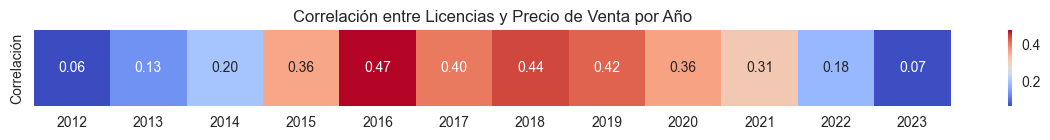

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_lic = pd.read_csv('../data/licencias_final.csv')
df_lic_long = df_lic.melt(id_vars='Territorio', var_name='Año', value_name='Licencias')
df_lic_long['Año'] = df_lic_long['Año'].astype(int)

df_precio = pd.read_csv('../data/precio_cv_final.csv')
df_precio_long = df_precio.melt(id_vars='Territorio', var_name='Año', value_name='Precio_venta')
df_precio_long['Año'] = df_precio_long['Año'].astype(int)

df_merged = pd.merge(df_lic_long, df_precio_long, on=['Territorio', 'Año'])

correlations = df_merged.groupby('Territorio')[['Licencias', 'Precio_venta']].corr().iloc[0::2, 1]
pivot_corr = df_merged.pivot_table(index='Territorio', columns='Año', values='Precio_venta')
pivot_lic = df_merged.pivot_table(index='Territorio', columns='Año', values='Licencias')

correlacion = pivot_corr.corrwith(pivot_lic, axis=0)

plt.figure(figsize=(12, 1.5))
sns.heatmap([correlacion], cmap='coolwarm', annot=True, fmt=".2f", xticklabels=correlacion.index, yticklabels=['Correlación'])
plt.title('Correlación entre Licencias y Precio de Venta por Año')
plt.tight_layout()
ruta = "../img/hipotesis_2/"
os.makedirs(ruta, exist_ok=True)
nombre_archivo = "relacion_licencias_precio_cv.jpg"
plt.savefig(os.path.join(ruta, nombre_archivo))
plt.show()


C:\Users\Eduardo\AppData\Local\Temp\ipykernel_1784\274314718.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlaciones = df.groupby('Año').apply(lambda g: g['Licencias'].corr(g['Precio_venta'])).reset_index()


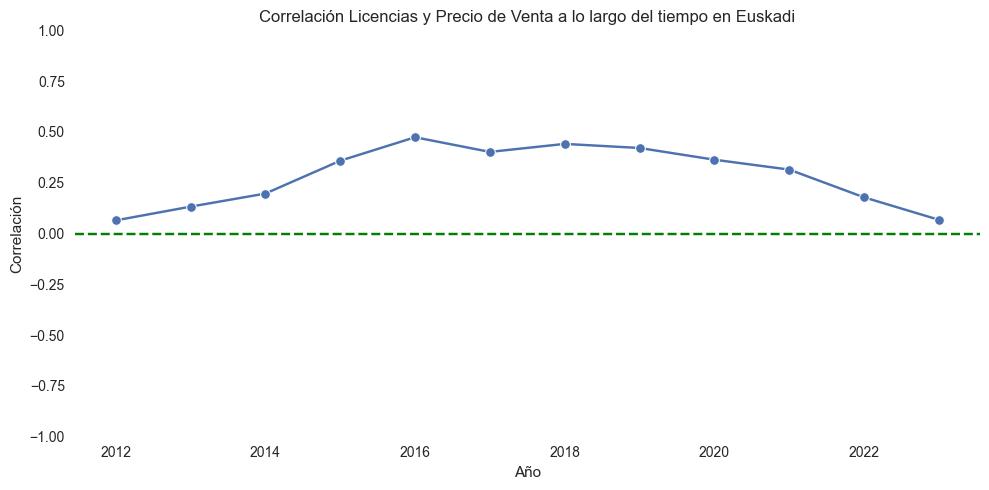

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_lic = pd.read_csv('../data/licencias_final.csv')
df_precio = pd.read_csv('../data/precio_cv_final.csv')

df_lic_long = df_lic.melt(id_vars='Territorio', var_name='Año', value_name='Licencias')
df_precio_long = df_precio.melt(id_vars='Territorio', var_name='Año', value_name='Precio_venta')

df_lic_long['Año'] = df_lic_long['Año'].astype(int)
df_precio_long['Año'] = df_precio_long['Año'].astype(int)

df = pd.merge(df_lic_long, df_precio_long, on=['Territorio', 'Año'])

correlaciones = df.groupby('Año').apply(lambda g: g['Licencias'].corr(g['Precio_venta'])).reset_index()
correlaciones.columns = ['Año', 'Correlación']

plt.figure(figsize=(10, 5))
sns.lineplot(data=correlaciones, x='Año', y='Correlación', marker='o')
plt.title('Correlación Licencias y Precio de Venta a lo largo del tiempo en Euskadi')
plt.ylim(-1, 1)
plt.axhline(0, color='green', linestyle='--')
plt.tight_layout()
ruta = "../img/hipotesis_2/"
os.makedirs(ruta, exist_ok=True)
nombre_archivo = "correlacion_licencias_precio_cv.jpg"
plt.savefig(os.path.join(ruta, nombre_archivo))
plt.show()


In [ ]:
import pandas as pd

df_licencias = pd.read_csv('../data/licencias_totales.csv')
df_precio = pd.read_csv('../data/precio_cv_final.csv')

df_lic_long = df_licencias.melt(id_vars='Territorio', var_name='Año', value_name='Licencias')
df_precio_long = df_precio.melt(id_vars='Territorio', var_name='Año', value_name='Precio_venta')

df_lic_long['Año'] = df_lic_long['Año'].astype(int)
df_precio_long['Año'] = df_precio_long['Año'].astype(int)

df = pd.merge(df_lic_long, df_precio_long, on=['Territorio', 'Año'])

correlaciones = (
    df.groupby('Territorio')[['Licencias', 'Precio_venta']]
    .corr()
    .iloc[0::2, -1]
    .reset_index()
    .rename(columns={'Precio_venta': 'Correlación'})[['Territorio', 'Correlación']]
)

print(correlaciones)


  Territorio  Correlación
0      Araba     0.327881
1    Bizkaia     0.704674
2        CAE     0.288847
3   Gipuzkoa     0.024784


C:\Users\Eduardo\AppData\Local\Temp\ipykernel_1784\2832359274.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=correlaciones, x='Territorio', y='Correlación', palette='coolwarm', edgecolor='black')


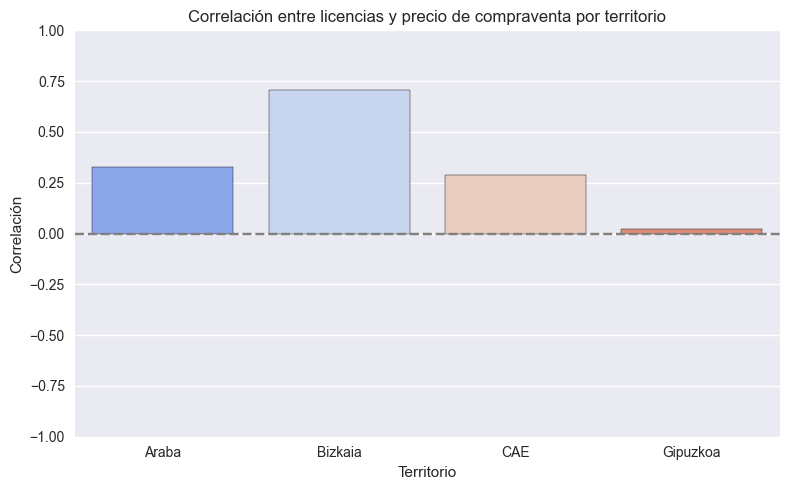

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(data=correlaciones, x='Territorio', y='Correlación', palette='coolwarm', edgecolor='black')

plt.title('Correlación entre licencias y precio de compraventa por territorio')
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()

ruta = "../img/hipotesis_2/"
os.makedirs(ruta, exist_ok=True)
nombre_archivo = "corelacion_licencias_precio_cv_territorio.jpg"
plt.savefig(os.path.join(ruta, nombre_archivo))


plt.show()


## Hipotesis 3 demanda no satisfecha de vivienda pública protegida y el aumento del precio del precio del alquiler

In [1]:
import pandas as pd

sol_df = pd.read_csv("../data/solicitantes_totales.csv")
entreg_df = pd.read_csv("../data/viviendas_etxebide_total.csv")
compra_df = pd.read_csv("../data/precio_cv_final.csv")
alquiler_df = pd.read_csv("../data/precio_alquiler_final.csv")

sol_long = sol_df.melt(id_vars="Territorio", var_name="Año", value_name="Solicitantes")
entreg_long = entreg_df.melt(id_vars="Territorio", var_name="Año", value_name="Viviendas_Entregadas")
compra_long = compra_df.melt(id_vars="Territorio", var_name="Año", value_name="Precio_Compraventa")
alquiler_long = alquiler_df.melt(id_vars="Territorio", var_name="Año", value_name="Precio_Alquiler")

sol_long["Año"] = sol_long["Año"].astype(str)
entreg_long["Año"] = entreg_long["Año"].astype(str)
compra_long["Año"] = compra_long["Año"].astype(str)
alquiler_long["Año"] = alquiler_long["Año"].astype(str)


df_merge_1 = pd.merge(sol_long, entreg_long, on=["Territorio", "Año"], how="outer")
df_merge_2 = pd.merge(df_merge_1, compra_long, on=["Territorio", "Año"], how="outer")
df_final = pd.merge(df_merge_2, alquiler_long, on=["Territorio", "Año"], how="outer")

cols_num = ["Solicitantes", "Viviendas_Entregadas", "Precio_Compraventa", "Precio_Alquiler"]
for col in cols_num:
    df_final[col] = pd.to_numeric(df_final[col], errors="coerce")

df_final = df_final.dropna(how="all", subset=cols_num)



In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar filas con datos completos para las variables
df_corr = df_final.dropna(subset=["Solicitantes", "Viviendas_Entregadas", "Precio_Compraventa", "Precio_Alquiler"])

# Calcular correlación
corr_matrix = df_corr[["Solicitantes", "Viviendas_Entregadas", "Precio_Compraventa", "Precio_Alquiler"]].corr()

print(corr_matrix)


                      Solicitantes  Viviendas_Entregadas  Precio_Compraventa  \
Solicitantes              1.000000              0.881700            0.236208   
Viviendas_Entregadas      0.881700              1.000000            0.098363   
Precio_Compraventa        0.236208              0.098363            1.000000   
Precio_Alquiler           0.346028              0.226109            0.728295   

                      Precio_Alquiler  
Solicitantes                 0.346028  
Viviendas_Entregadas         0.226109  
Precio_Compraventa           0.728295  
Precio_Alquiler              1.000000  


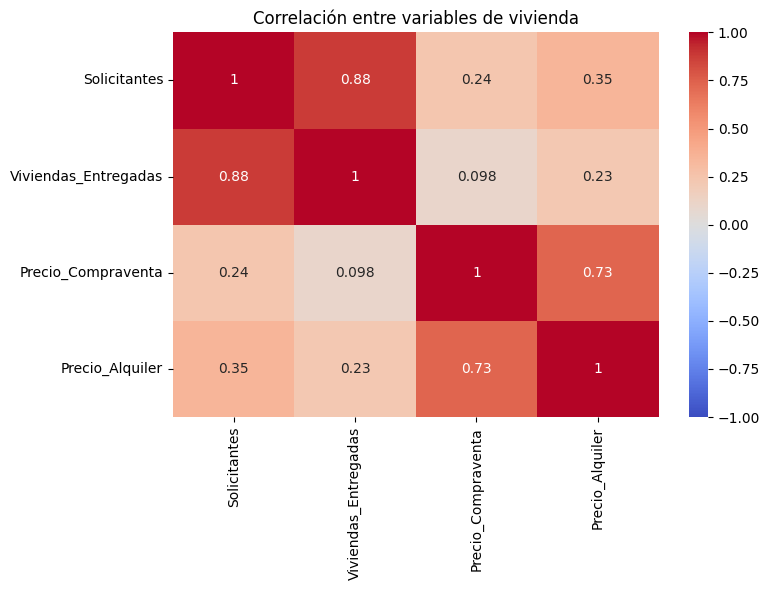

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlación entre variables de vivienda")
plt.tight_layout()

ruta = "../img/hipotesis_3/"
os.makedirs(ruta, exist_ok=True)
nombre_archivo = "corelacion_vpo_precios.jpg"
plt.savefig(os.path.join(ruta, nombre_archivo))
plt.show()


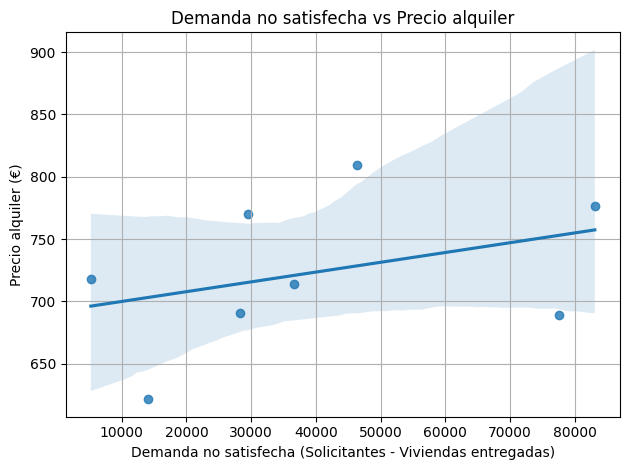

In [ ]:
df_final["Demanda_No_Satisfecha"] = df_final["Solicitantes"] - df_final["Viviendas_Entregadas"]
# Evita valores negativos, que no tienen sentido aquí
df_final["Demanda_No_Satisfecha"] = df_final["Demanda_No_Satisfecha"].clip(lower=0)

df_test = df_final.dropna(subset=["Demanda_No_Satisfecha", "Precio_Alquiler"])

corr = df_test["Demanda_No_Satisfecha"].corr(df_test["Precio_Alquiler"])

sns.regplot(data=df_test, x="Demanda_No_Satisfecha", y="Precio_Alquiler")
plt.title("Demanda no satisfecha vs Precio alquiler")
plt.xlabel("Demanda no satisfecha (Solicitantes - Viviendas entregadas)")
plt.ylabel("Precio alquiler (€)")
plt.grid(True)
plt.tight_layout()
ruta = "../img/hipotesis_3/"
os.makedirs(ruta, exist_ok=True)
nombre_archivo = "demanda_nosatisfecha_precio_alquiler.jpg"
plt.savefig(os.path.join(ruta, nombre_archivo))
plt.show()





## Hipotesis 4 Pisos turísticos

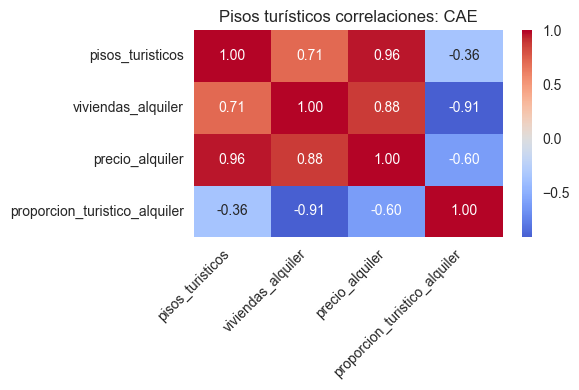

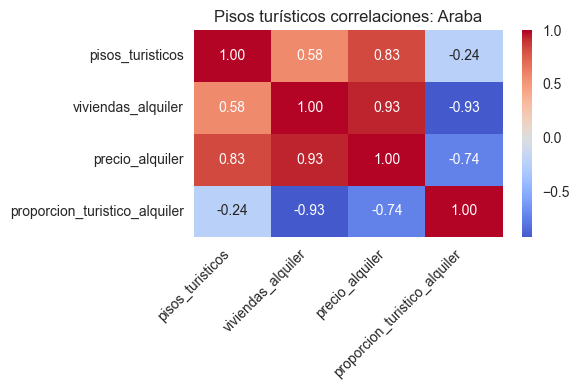

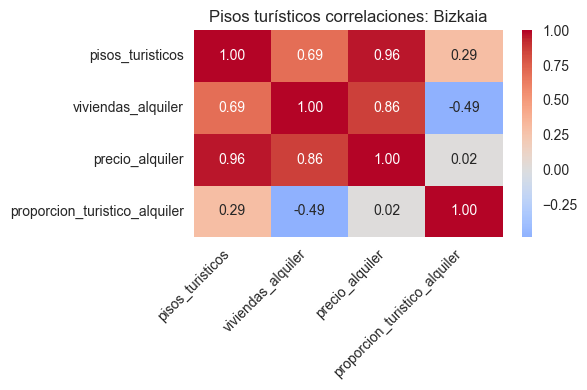

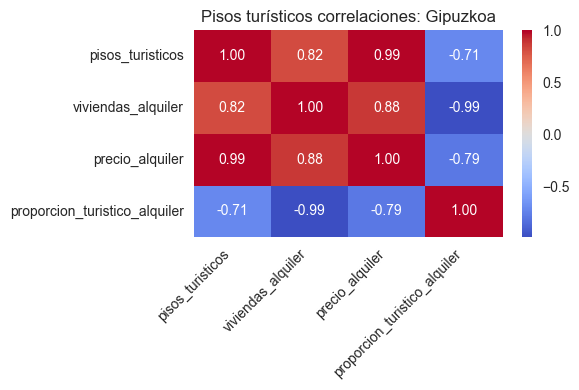

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def cargar_csv_wide(path, nombre_variable):
    df = pd.read_csv(path, sep=",")
    df.columns = df.columns.str.strip()
    df = df.melt(id_vars="Territorio", var_name="Año", value_name=nombre_variable)
    df["Año"] = df["Año"].astype(int)
    df[nombre_variable] = df[nombre_variable].astype(float)
    return df

df_alquiler = cargar_csv_wide("../data/viviendas_alquiler.csv", "viviendas_alquiler")
df_turisticos = cargar_csv_wide("../data/viviendas_turisticas.csv", "pisos_turisticos")
df_precios = cargar_csv_wide("../data/precio_alquiler_final.csv", "precio_alquiler")

df = df_alquiler.merge(df_turisticos, on=["Territorio", "Año"], how="inner") \
                .merge(df_precios, on=["Territorio", "Año"], how="inner")

df["proporcion_turistico_alquiler"] = df["pisos_turisticos"] / df["viviendas_alquiler"]

territorios = df["Territorio"].unique()

for territorio in territorios:
    df_territorio = df[df["Territorio"] == territorio]
    cor = df_territorio[["pisos_turisticos", "viviendas_alquiler", "precio_alquiler", "proporcion_turistico_alquiler"]].corr()

    plt.figure(figsize=(6, 4))
    sns.heatmap(cor, annot=True, cmap="coolwarm", center=0, fmt=".2f")
    plt.title(f"Pisos turísticos correlaciones: {territorio}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    ruta = "../img/hipotesis_4/"
    os.makedirs(ruta, exist_ok=True)
    nombre_archivo = "pisos_turisticos_correlaciones.jpg"
    plt.savefig(os.path.join(ruta, nombre_archivo))


## Hipotesis 5 Ha aumentado el precio medio del metro cuadrado en la misma proporción que el precio de venta/alquiler del inmueble? 

In [2]:
import pandas as pd

# Leer archivos CSV desde disco
df_m2 = pd.read_csv("../data/precio_m2_final.csv")
df_total = pd.read_csv("../data/precio_cv_final.csv")

df_m2_long = df_m2.melt(id_vars='Territorio', var_name='Año', value_name='Precio_m2')
df_total_long = df_total.melt(id_vars='Territorio', var_name='Año', value_name='Precio_total')

df_combined = pd.merge(df_m2_long, df_total_long, on=['Territorio', 'Año'])

# Calcular superficie estimada
df_combined['Superficie_estim_m2'] = df_combined['Precio_total'] / df_combined['Precio_m2']

df_combined = df_combined.sort_values(by=['Territorio', 'Año'])

# Asegurar que Año es numérico
df_combined['Año'] = df_combined['Año'].astype(int)

# Ordenar
df_combined = df_combined.sort_values(['Territorio', 'Año'])

# Calcular tasas de variación (%)
df_combined['Var_pct_m2'] = df_combined.groupby('Territorio')['Precio_m2'].pct_change() * 100
df_combined['Var_pct_total'] = df_combined.groupby('Territorio')['Precio_total'].pct_change() * 100

# Diferencia entre las tasas
df_combined['Diferencia_pct'] = df_combined['Var_pct_m2'] - df_combined['Var_pct_total']

# Mostrar resumen por territorio
resumen = df_combined.groupby('Territorio')[['Var_pct_m2', 'Var_pct_total', 'Diferencia_pct']].mean().round(2)
print(resumen)

df_combined.to_csv("../data/variaciones_precio_vs_total.csv", index=False)


print(df_combined.head())



            Var_pct_m2  Var_pct_total  Diferencia_pct
Territorio                                           
Araba             0.91           1.45           -0.55
Bizkaia           0.21           0.04            0.17
CAE               0.93           1.04           -0.11
Gipuzkoa          1.82           2.08           -0.26
   Territorio   Año  Precio_m2  Precio_total  Superficie_estim_m2  Var_pct_m2  \
1       Araba  2012    2100.65     196940.00            93.751934         NaN   
5       Araba  2013    2016.62     188964.50            93.703573   -4.000190   
9       Araba  2014    1855.75     169159.75            91.154385   -7.977209   
13      Araba  2015    1667.81     167763.00           100.588796  -10.127442   
17      Araba  2016    1653.39     157015.25            94.965646   -0.864607   

    Var_pct_total  Diferencia_pct  
1             NaN             NaN  
5       -4.049711        0.049520  
9      -10.480672        2.503463  
13      -0.825699       -9.301743  
17      -

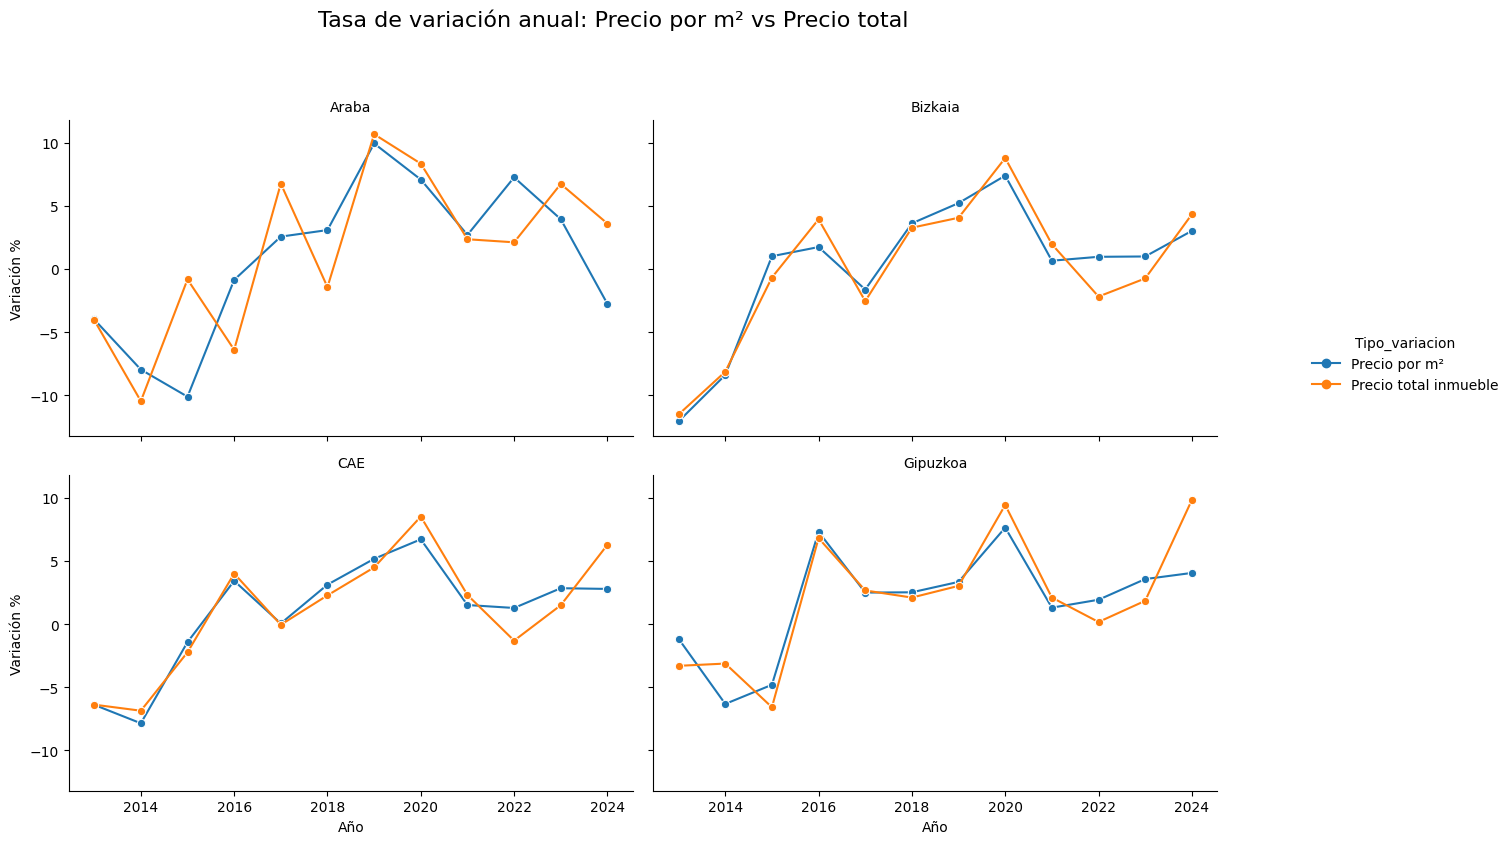

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

df_m2 = pd.read_csv("../data/precio_m2_final.csv")
df_total = pd.read_csv("../data/precio_cv_final.csv")

df_m2_long = df_m2.melt(id_vars='Territorio', var_name='Año', value_name='Precio_m2')
df_total_long = df_total.melt(id_vars='Territorio', var_name='Año', value_name='Precio_total')

df_combined = pd.merge(df_m2_long, df_total_long, on=['Territorio', 'Año'])

df_combined['Superficie_estim_m2'] = df_combined['Precio_total'] / df_combined['Precio_m2']

df_combined = df_combined.sort_values(by=['Territorio', 'Año'])

df_combined['Año'] = df_combined['Año'].astype(int)

df_combined = df_combined.sort_values(['Territorio', 'Año'])

df_combined['Var_pct_m2'] = df_combined.groupby('Territorio')['Precio_m2'].pct_change() * 100
df_combined['Var_pct_total'] = df_combined.groupby('Territorio')['Precio_total'].pct_change() * 100

df_combined['Diferencia_pct'] = df_combined['Var_pct_m2'] - df_combined['Var_pct_total']

resumen = df_combined.groupby('Territorio')[['Var_pct_m2', 'Var_pct_total', 'Diferencia_pct']].mean().round(2)

df_combined.to_csv("../data/variaciones_precio_vs_total.csv", index=False)

# Melt para juntar ambas tasas en una sola columna para los graficos
df_plot = pd.melt(
    df_combined,
    id_vars=['Territorio', 'Año'],
    value_vars=['Var_pct_m2', 'Var_pct_total'],
    var_name='Tipo_variacion',
    value_name='Variacio%'
)

df_plot['Tipo_variacion'] = df_plot['Tipo_variacion'].map({
    'Var_pct_m2': 'Precio por m²',
    'Var_pct_total': 'Precio total inmueble'
})

g = sns.relplot(
    data=df_plot,
    x='Año',
    y='Variacio%',
    hue='Tipo_variacion',
    kind='line',
    col='Territorio',
    col_wrap=2,
    facet_kws={'sharey': True},  
    height=4,
    aspect=1.3,
    marker='o'
)

g.set_titles("{col_name}")
g.figure.suptitle("Tasa de variación anual: Precio por m² vs Precio total", fontsize=16, y=1.05)
g.set_axis_labels("Año", "Variación %")

g._legend.set_bbox_to_anchor((1.05, 0.6))
g._legend.set_loc('center left')

for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()

ruta = "../img/hipotesis_5/"
os.makedirs(ruta, exist_ok=True)
nombre_archivo = "variacion_precio_m2_cv.jpg"
plt.savefig(os.path.join(ruta, nombre_archivo), bbox_inches='tight')  
plt.show()


## Hipótesis 6 - Inmigración y solicitantes

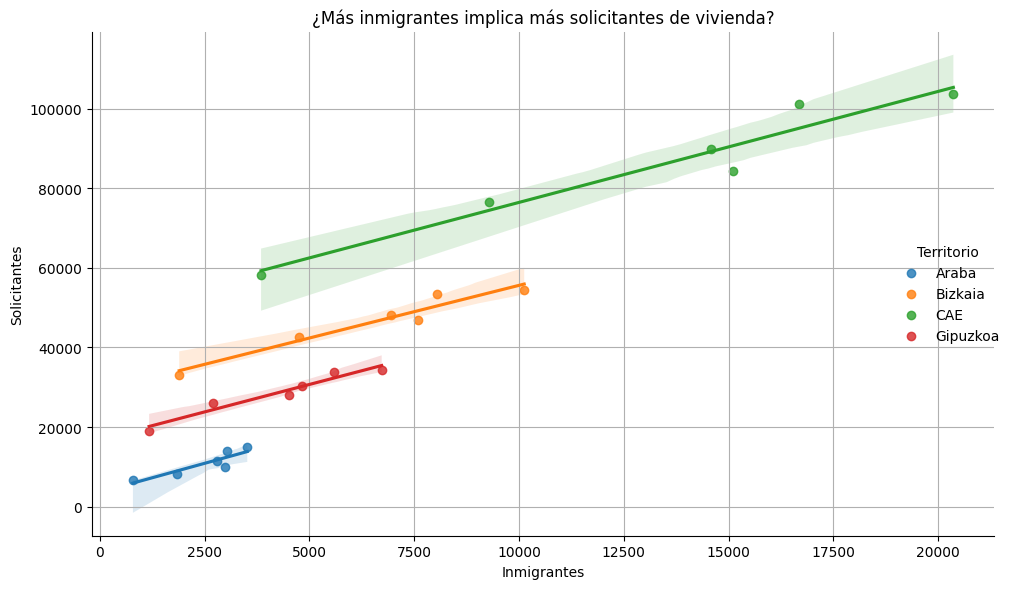

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sol_df = pd.read_csv("../data/solicitantes_totales.csv")
inm_df = pd.read_csv("../data/poblacion_extranjera_total.csv")

sol_long = sol_df.melt(id_vars="Territorio", var_name="Año", value_name="Solicitantes")
inm_long = inm_df.melt(id_vars="Territorio", var_name="Año", value_name="Inmigrantes")

sol_long["Año"] = sol_long["Año"].astype(str)
inm_long["Año"] = inm_long["Año"].astype(str)

merged = pd.merge(sol_long, inm_long, on=["Territorio", "Año"], how="inner")

merged = merged.dropna()

merged["Solicitantes"] = pd.to_numeric(merged["Solicitantes"], errors='coerce')
merged["Inmigrantes"] = pd.to_numeric(merged["Inmigrantes"], errors='coerce')

sns.lmplot(data=merged, x="Inmigrantes", y="Solicitantes", hue="Territorio", height=6, aspect=1.5)
plt.title("¿Más inmigrantes implica más solicitantes de vivienda?")
plt.grid(True)
plt.tight_layout()
ruta = "../img/hipotesis_6/"
os.makedirs(ruta, exist_ok=True)
nombre_archivo = "relacion_inmigracion_solicitantes.jpg"
plt.savefig(os.path.join(ruta, nombre_archivo))
plt.show()


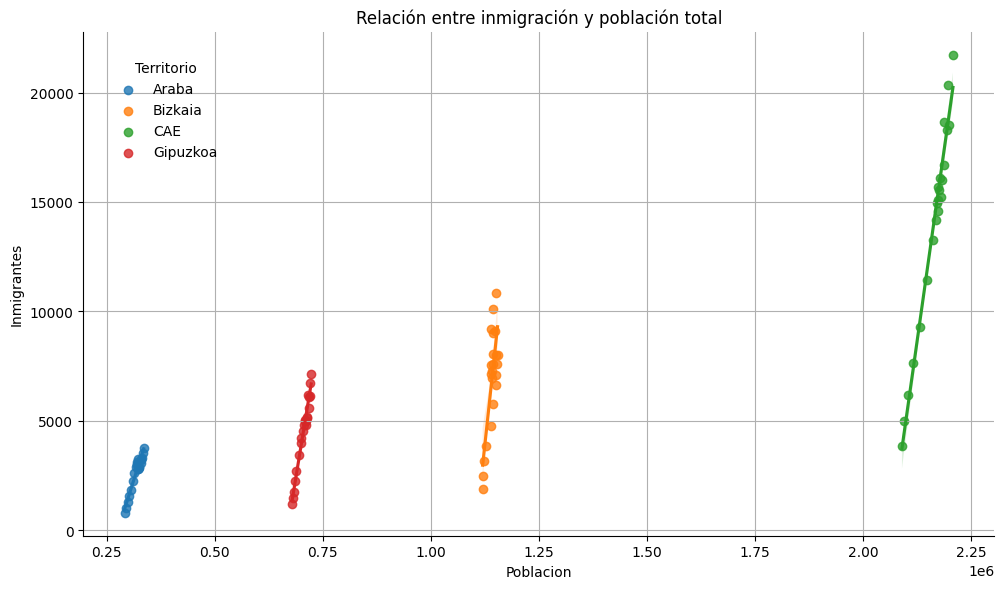

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

inm_df = pd.read_csv("../data/poblacion_extranjera_total.csv")
pob_df = pd.read_csv("../data/poblacion_total_limpio.csv")

inm_long = inm_df.melt(id_vars="Territorio", var_name="Año", value_name="Inmigrantes")
pob_long = pob_df.melt(id_vars="Territorio", var_name="Año", value_name="Poblacion")

merged = pd.merge(inm_long, pob_long, on=["Territorio", "Año"], how="inner")

merged["Inmigrantes"] = pd.to_numeric(merged["Inmigrantes"], errors='coerce')
merged["Poblacion"] = pd.to_numeric(merged["Poblacion"], errors='coerce')

merged = merged.dropna()

g = sns.lmplot(data=merged, x="Poblacion", y="Inmigrantes", hue="Territorio", height=6, aspect=1.5)

plt.title("Relación entre inmigración y población total")
plt.grid(True)
plt.tight_layout()

g._legend.set_bbox_to_anchor((0.1, 0.90)) 
g._legend.set_loc('upper left')

ruta = "../img/hipotesis_6/"
os.makedirs(ruta, exist_ok=True)
nombre_archivo = "relacion_inmigracion_poblacion.jpg"
plt.savefig(os.path.join(ruta, nombre_archivo))

plt.show()


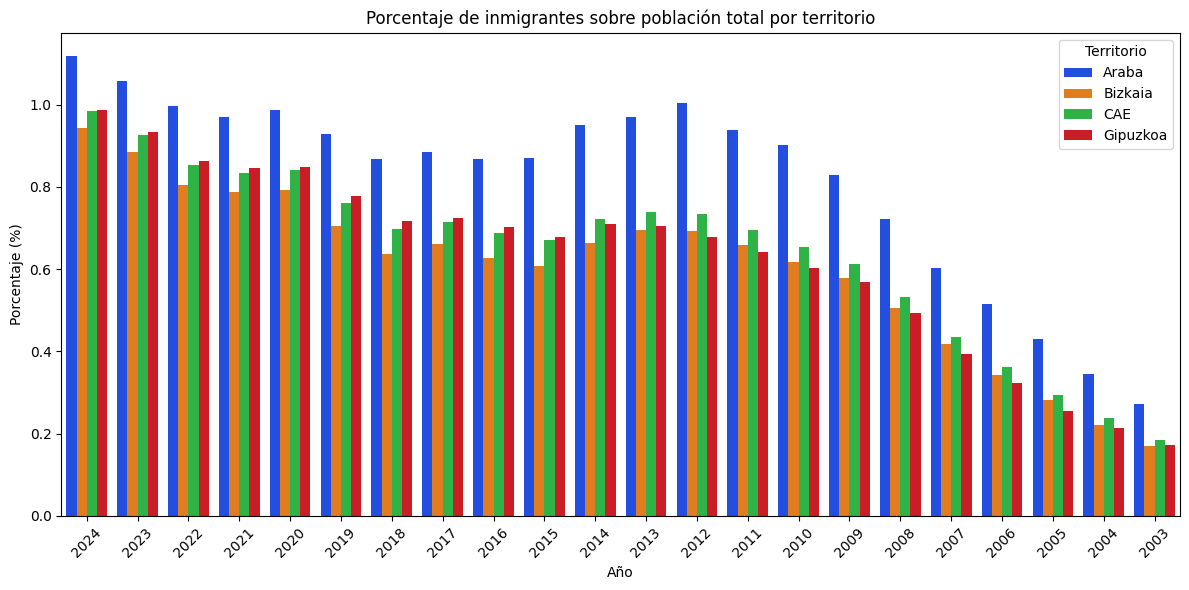

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar y transformar datos
inm_df = pd.read_csv("../data/poblacion_extranjera_total.csv")
pob_df = pd.read_csv("../data/poblacion_total_limpio.csv")

inm_long = inm_df.melt(id_vars="Territorio", var_name="Año", value_name="Inmigrantes")
pob_long = pob_df.melt(id_vars="Territorio", var_name="Año", value_name="Poblacion")

merged = pd.merge(inm_long, pob_long, on=["Territorio", "Año"], how="inner")

# Asegurar datos numéricos
merged["Inmigrantes"] = pd.to_numeric(merged["Inmigrantes"], errors='coerce')
merged["Poblacion"] = pd.to_numeric(merged["Poblacion"], errors='coerce')

# Eliminar nulos
merged = merged.dropna()

# Calcular proporción o porcentaje
merged["Proporcion"] = merged["Inmigrantes"] / merged["Poblacion"]
# Opcional: en porcentaje
merged["Porcentaje"] = merged["Proporcion"] * 100

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(data=merged, x="Año", y="Porcentaje", hue="Territorio", palette="bright",errorbar=None)
plt.title("Porcentaje de inmigrantes sobre población total por territorio")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=45)
plt.tight_layout()

ruta = "../img/hipotesis_6/"
os.makedirs(ruta, exist_ok=True)
nombre_archivo = "relacion_inmigrantes_poblacion_territorio.jpg"
plt.savefig(os.path.join(ruta, nombre_archivo))
plt.show()


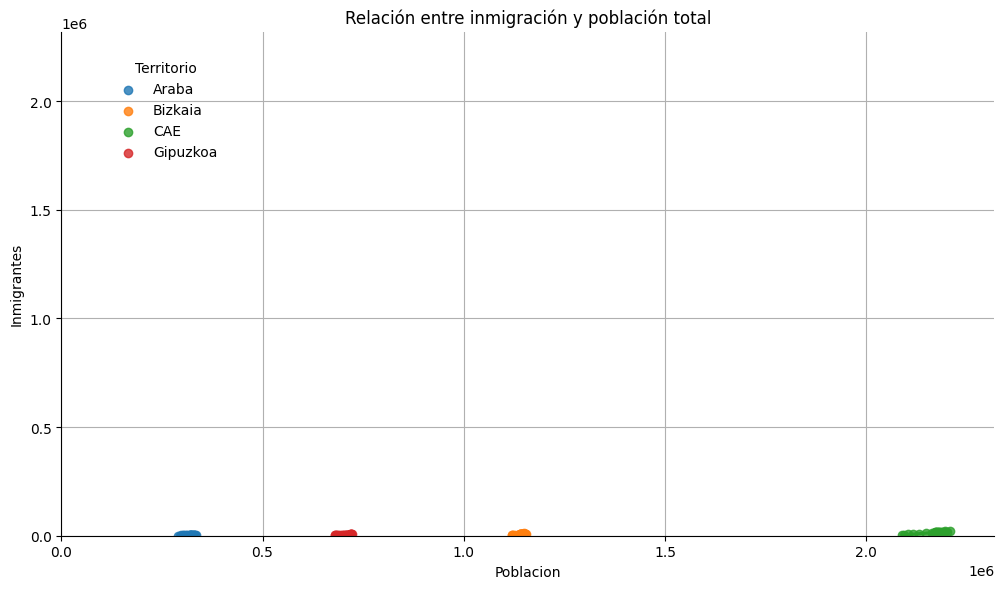

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


inm_df = pd.read_csv("../data/poblacion_extranjera_total.csv")
pob_df = pd.read_csv("../data/poblacion_total_limpio.csv")


inm_long = inm_df.melt(id_vars="Territorio", var_name="Año", value_name="Inmigrantes")
pob_long = pob_df.melt(id_vars="Territorio", var_name="Año", value_name="Poblacion")


merged = pd.merge(inm_long, pob_long, on=["Territorio", "Año"], how="inner")

merged["Inmigrantes"] = pd.to_numeric(merged["Inmigrantes"], errors='coerce')
merged["Poblacion"] = pd.to_numeric(merged["Poblacion"], errors='coerce')


merged = merged.dropna()

max_val = max(merged["Inmigrantes"].max(), merged["Poblacion"].max())

g = sns.lmplot(data=merged, x="Poblacion", y="Inmigrantes", hue="Territorio", height=6, aspect=1.5)

#Establececemos los valores de los ejes para que se muestren en la misma
margin = max_val * 0.05 
g.set(xlim=(0, max_val + margin), ylim=(0, max_val + margin))


plt.title("Relación entre inmigración y población total")
plt.tight_layout()
plt.grid(True)
g._legend.set_bbox_to_anchor((0.1, 0.90))
g._legend.set_loc('upper left')

ruta = "../img/hipotesis_6/"
os.makedirs(ruta, exist_ok=True)
nombre_archivo = "relacion_inmigracion_poblacion_mismaescala.jpg"
plt.savefig(os.path.join(ruta, nombre_archivo))

plt.show()

## Hipotesis 7 Un mayor porcentaje de mujeres electas en los gobiernos municipales se asocia con políticas de vivienda más activas o eficaces.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mujeres = pd.read_csv("../data/mujeres_limpio.csv")
licencias = pd.read_csv("../data/licencias_totales.csv")
suelo = pd.read_csv("../data/suelo_urbanizable_final.csv")

mujeres_long = mujeres.melt(id_vars="Territorio", var_name="Año", value_name="Mujeres_electas")
licencias_long = licencias.melt(id_vars="Territorio", var_name="Año", value_name="Licencias")
suelo_long = suelo.melt(id_vars="Territorio", var_name="Año", value_name="Suelo")

df = mujeres_long.merge(licencias_long, on=["Territorio", "Año"], how="inner")
df = df.merge(suelo_long, on=["Territorio", "Año"], how="left")

df["Año"] = df["Año"].astype(int)


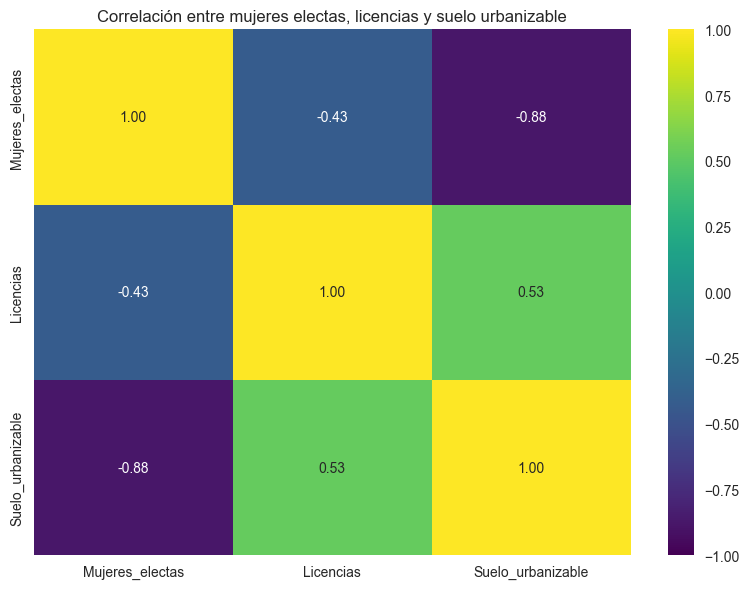

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")  # Un estilo tipo seaborn más suave



mujeres = pd.read_csv("../data/mujeres_limpio.csv")
licencias = pd.read_csv("../data/licencias_totales.csv")
suelo = pd.read_csv("../data/suelo_urbanizable_final.csv")

mujeres_long = mujeres.melt(id_vars="Territorio", var_name="Año", value_name="Mujeres_electas")
licencias_long = licencias.melt(id_vars="Territorio", var_name="Año", value_name="Licencias")
suelo_long = suelo.melt(id_vars="Territorio", var_name="Año", value_name="Suelo_urbanizable")

df = mujeres_long.merge(licencias_long, on=["Territorio", "Año"], how="inner")
df = df.merge(suelo_long, on=["Territorio", "Año"], how="left")

df["Año"] = df["Año"].astype(int)

corr_matrix = df[["Mujeres_electas", "Licencias", "Suelo_urbanizable"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="viridis", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlación entre mujeres electas, licencias y suelo urbanizable")
plt.tight_layout()

ruta = "../img/hipotesis_7/"
os.makedirs(ruta, exist_ok=True)
nombre_archivo = "relacion_mujeres_licencias.jpg"
plt.savefig(os.path.join(ruta, nombre_archivo))
plt.show()